In [96]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from glob import glob
import numpy as np
from sklearn import datasets, linear_model

In [97]:
xls_data = sorted(glob('Dataset/*.xls'))

apple = None

for xls in xls_data:
    xl = pd.ExcelFile(xls)
    for sheet in xl.sheet_names:
        if sheet.startswith("Coco"):
            continue
        df = xl.parse(sheet, skiprows=3)
        df.iloc[6,1] = df.iloc[0,1]
        df.iloc[0,1] = np.nan
        df.iloc[14,1] = df.iloc[7,1]
        df.iloc[7,1] = np.nan
        df = df[df.iloc[:,1].notnull()]
        df.drop(df.columns[[0,2]],axis=1,inplace=True)
        apple = df.iloc[:21,:]
#         print(apple.shape)

apple
    

,Items States,Andhra Pradesh,Karnataka,Maharashtra,Tamil Nadu,Uttar Pradesh,Uttarakhand
6,Cost of Cultivation (Rs./Hectare),163567.80,119526.52,194375.62,163112.19,98258.12,92069.24
10,,199.24,130.11,160.97,149.24,143.64,134.77
14,Cost of Production (Rs./Qtl),240.30,159.54,202.06,190.75,191.24,163.67
15,Value of Main Product (Rs./Hectare),178032.90,158767.40,187343.80,225461.80,156313.80,159739.80
16,Value of By- Product (Rs./Hectare),4224.01,2997.71,12275.34,3480.06,6897.05,11347.79
17,Material & Labour Input per Hectare of,NaN,NaN,NaN,NaN,NaN,NaN
18,Seed (Qtl.),65.90,38.67,32.60,23.90,16.07,23.06
19,Fertilizer (Kg. Nutrients),549.98,391.25,640.70,417.47,198.43,126.98
20,Manure (Qtl.),13.95,14.20,36.21,43.22,4.37,30.68
21,Human Labour* (Man Hrs.),1616.18,1191.68,1800.07,1731.38,1184.29,968.30


In [98]:
xls_data = sorted(glob('Dataset/*.xls'))

state = "Maharashtra"
apple = []
year = []
sheetnames = []

required_elements = [5,6,7,8,9,11,12,13,14,15,21]

for xls in xls_data:
    xl = pd.ExcelFile(xls)
    sheetnames = sheetnames + xl.sheet_names
y = set(sheetnames)
y = list(y)
print(y)

items = np.zeros((len(y),10,11))

for xls in xls_data:
    xl = pd.ExcelFile(xls)
    for sheet in xl.sheet_names:
        if sheet.startswith("Coco"):
            continue
        df = xl.parse(sheet, skiprows=3)
        df.iloc[6,1] = df.iloc[0,1]
        df.iloc[0,1] = np.nan
        df.iloc[14,1] = df.iloc[7,1]
        df.iloc[7,1] = np.nan
        df = df[df.iloc[:,1].notnull()]
        df.drop(df.columns[[0,2]],axis=1,inplace=True)
        df = df.iloc[:21,:]
#         df[state].shape
        try:
            for i,element in enumerate(required_elements):
                items[y.index(sheet),i,int(xls[8:12])-2004] = df[state].iloc[element]
        except:
            pass
    year.append([int(xls[8:12])])

print(items)
apple,year

['Soyabean', 'Sesamum', 'Nigerseed', 'Moong', 'Coconut TN', 'Paddy', 'Potato', 'Ragi', 'Groundnut', 'VFCTobacco', 'Safflower', 'Onion', 'Coconut', 'Lentil', 'Urad', 'Jute', 'Sunflower', 'Coconut Ke', 'Jowar', 'Cotton', 'Maize', 'Peas', 'Bajra', 'Arhar', 'Gram', 'Wheat', 'R&M', 'Barley', 'Sugarcane']
[[[ 79.07  77.39  79.02 ...  76.77  74.3   81.78]
  [ 65.77  52.12  72.1  ...  78.27  77.76  78.24]
  [  3.71   7.01   6.66 ...   9.8    8.54  13.05]
  ...
  [ 50.72  54.05  60.72 ... 136.   191.28 151.45]
  [  5.92   6.57   7.01 ...  22.04  24.37  26.37]
  [ 53.02  41.72  50.14 ...  70.62  78.98  84.07]]

 [[  0.     0.     0.   ...   0.     0.     0.  ]
  [  0.     0.     0.   ...   0.     0.     0.  ]
  [  0.     0.     0.   ...   0.     0.     0.  ]
  ...
  [  0.     0.     0.   ...   0.     0.     0.  ]
  [  0.     0.     0.   ...   0.     0.     0.  ]
  [  0.     0.     0.   ...   0.     0.     0.  ]]

 [[  0.     0.     0.   ...   0.     0.     0.  ]
  [  0.     0.     0.   ...   0. 

([],
 [[2004],
  [2005],
  [2006],
  [2007],
  [2008],
  [2009],
  [2010],
  [2011],
  [2012],
  [2013],
  [2014]])

In [99]:
for i in range(0,len(items)):
    for j in range(0,len(items[0])):
        for k in range(0,len(items[0][0])):
            if np.isnan(items[i,j,k]):
                items[i,j,k] = 0
for i in range(0,len(items)):
    for j in range(0,len(items[0])):
        for k in range(0,len(items[0][0])):
            if np.isnan(items[i,j,k]):
                items[i,j,k] = np.mean(items[i][j])
models = [[0 for y in range(0,len(items[0]))] for x in range(0,len(items))] 
for i in range(0,len(items)):
    for j in range(0,len(items[0])):
        models[i][j] = linear_model.LinearRegression()
        models[i][j].fit(year, items[i,j])

In [116]:
area = 2
all_crops=[]
ans = np.zeros((len(y),10))
cost = np.zeros((len(y)))
gain = np.zeros((len(y)))
supp = 1500
for i in range(0,len(items)):
    for j in range(0,len(items[0])):
        ans[i][j] = models[i][j].predict(2017)
max_num=0
max_index=0
for i in range(0,len(items)):
    for j in range(0,int(len(ans[0])/2)):
        cost[i]+=ans[i][j]*ans[i][j+5]
#     print((ans[i][len(items[0])-1]*supp-cost[i])*2)
    all_crops.append((ans[i][len(items[0])-1]*supp-cost[i])*2)
    if ((ans[i][len(items[0])-1]*supp-cost[i])*2) > max_num:
        max_num = ((ans[i][len(items[0])-1]*supp-cost[i])*2)
        max_index = i
print(max(all_crops),y[i])

316607.37219008344 Sugarcane


In [81]:
import fbprophet
m = fbprophet.Prophet(growth='logistic')

In [82]:
# year = [2004, 2015, 2017]
ts = pd.DataFrame(list(zip(*[year,apple])))

In [84]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(year, apple)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
y_pred = regr.predict([[2015],[2017]])

In [93]:
print(y_pred, apple)

[79.37254545 88.12672727] [32.58, 30.07, 34.45, 36.91, 45.72, 67.27, 75.31, 67.44, 66.64, 61.66, 66.16]


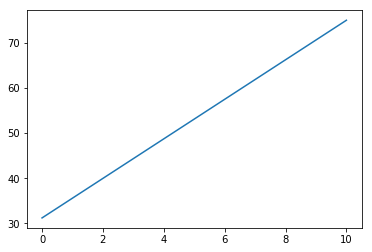

In [89]:
plt.plot(y_pred)

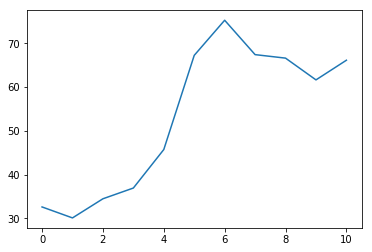

In [90]:
plt.plot(apple)